

# Prediction of the Success of Bank Telemarketing





In [29]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import show

## Data Description

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 

The classification goal is to predict if the client will subscribe a term deposit (variable y).

Different types of variables are included in data, including:

 - client data
 - Parameters related with the last contact of the current campaign
 - Social and economic context attributes

In [38]:
#read the data
df = pd.read_csv('Bank_Marketing.csv')

print('There are',len(df), 'observations in the dataset.')

#display first 5 rows
df.head()

There are 41188 observations in the dataset.


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [31]:
#Variable definition
v_def = pd.read_excel("Variables.xlsx", sep = ",", header = 0)
pd.set_option('max_colwidth', 120)
print('            Table 1. Variable Definition')
v_def

            Table 1. Variable Definition


,Variabe,Definition,Classes
0,Age,age of the client,_
1,Job,type of job,"admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student'..."
2,Marital,marital status,"divorced' (divorced or widowed)), 'married', 'single', 'unknown'"
3,Education,education level,"basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'"
4,Default,has credit in default?,"no', 'yes', 'unknown'"
5,Housing,has housing loan?,"no', 'yes', 'unknown'"
6,Loan,has personal loan?,"no', 'yes', 'unknown'"
7,Contact,contact communication type,"'cellular','telephone'"
8,Month,last contact month of year,"jan', 'feb', 'mar', …, 'nov', 'dec'"
9,Dayofweek,last contact day of the week,"mon','tue','wed','thu','fri'"


## Discriptive Statistics

As shown by Table 2 and Table 3, the size of the group who didn't subscribe (failure of the campaign) is around 8 times larger than those who subscribed a term deposit (Success of the campaign). Thus, current data is noticeably imbalanced.

Additionally, it can be seen that other than the employee variation rate which appear with negative and positive mean values at two groups, other variables don't seem to be noticeably different across these groups.

In [91]:
print('                                     Table 2. Descriptive Statistics for clients who subscribed')
df[df['y']=='yes'].describe().T

                                     Table 2. Descriptive Statistics for clients who subscribed


,count,mean,std,min,25%,50%,75%,max
age,4640.0,40.913147,13.837476,17.000,31.000,37.000,50.000,98.000
duration,4640.0,553.191164,401.171871,37.000,253.000,449.000,741.250,4199.000
campaign,4640.0,2.051724,1.666245,1.000,1.000,2.000,2.000,23.000
pdays,4640.0,792.035560,403.407181,0.000,999.000,999.000,999.000,999.000
previous,4640.0,0.492672,0.860344,0.000,0.000,0.000,1.000,6.000
emp.var.rate,4640.0,-1.233448,1.623626,-3.400,-1.800,-1.800,-0.100,1.400
cons.price.idx,4640.0,93.354386,0.676644,92.201,92.893,93.200,93.918,94.767
cons.conf.idx,4640.0,-39.789784,6.139668,-50.800,-46.200,-40.400,-36.100,-26.900
euribor3m,4640.0,2.123135,1.742598,0.634,0.849,1.266,4.406,5.045
nr.employed,4640.0,5095.115991,87.572641,4963.600,5017.500,5099.100,5191.000,5228.100


In [92]:
print('                                     Table 3. Descriptive Statistics for clients who did not subscribe')
df[df['y']=='no'].describe().T

                                     Table 3. Descriptive Statistics for clients who did not subscribe


,count,mean,std,min,25%,50%,75%,max
age,36548.0,39.911185,9.898132,17.000,32.000,38.000,47.000,95.000
duration,36548.0,220.844807,207.096293,0.000,95.000,163.500,279.000,4918.000
campaign,36548.0,2.633085,2.873438,1.000,1.000,2.000,3.000,56.000
pdays,36548.0,984.113878,120.656868,0.000,999.000,999.000,999.000,999.000
previous,36548.0,0.132374,0.409199,0.000,0.000,0.000,0.000,7.000
emp.var.rate,36548.0,0.248875,1.482932,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,36548.0,93.603757,0.558993,92.201,93.075,93.918,93.994,94.767
cons.conf.idx,36548.0,-40.593097,4.391155,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,36548.0,3.811491,1.638187,0.634,1.405,4.857,4.962,5.045
nr.employed,36548.0,5176.166600,64.571979,4963.600,5099.100,5195.800,5228.100,5228.100


As in dicated in the correlation matrix (Figure 1.), there are few pairs of highly-correlated variables, including emp.var.rate with cons.price.idx, euribor3m and nr.employed.

Thus, in order to address potential multi-collinearity issues, we need to exclude some of these variables from the classification algorithm. 


In [99]:
# Correlation Matrix
print('                         Table 4. Correlation between Continuous Variables')
corr_mat=df.corr()
corr_mat.style.background_gradient(cmap='coolwarm').set_precision(2)

                         Table 4. Correlation between Continuous Variables


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1,-0.00087,0.0046,-0.034,0.024,-0.00037,0.00086,0.13,0.011,-0.018
duration,-0.00087,1,-0.072,-0.048,0.021,-0.028,0.0053,-0.0082,-0.033,-0.045
campaign,0.0046,-0.072,1,0.053,-0.079,0.15,0.13,-0.014,0.14,0.14
pdays,-0.034,-0.048,0.053,1,-0.59,0.27,0.079,-0.091,0.3,0.37
previous,0.024,0.021,-0.079,-0.59,1,-0.42,-0.2,-0.051,-0.45,-0.5
emp.var.rate,-0.00037,-0.028,0.15,0.27,-0.42,1,0.78,0.2,0.97,0.91
cons.price.idx,0.00086,0.0053,0.13,0.079,-0.2,0.78,1,0.059,0.69,0.52
cons.conf.idx,0.13,-0.0082,-0.014,-0.091,-0.051,0.2,0.059,1,0.28,0.1
euribor3m,0.011,-0.033,0.14,0.3,-0.45,0.97,0.69,0.28,1,0.95
nr.employed,-0.018,-0.045,0.14,0.37,-0.5,0.91,0.52,0.1,0.95,1


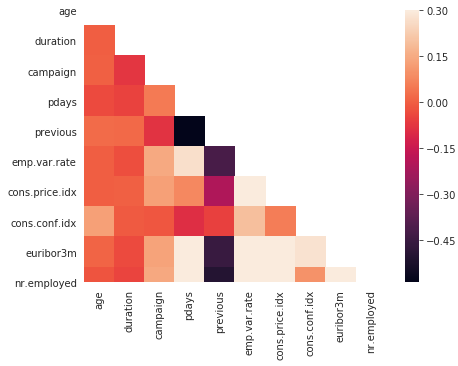

In [98]:
mask = np.zeros_like(corr_mat)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr_mat, mask=mask, vmax=.3, square=True)

### Visualizations

In the following, different charts are created based on different levels of categorical variables and the variation of numeric variables. Comments will be made wherever needed.

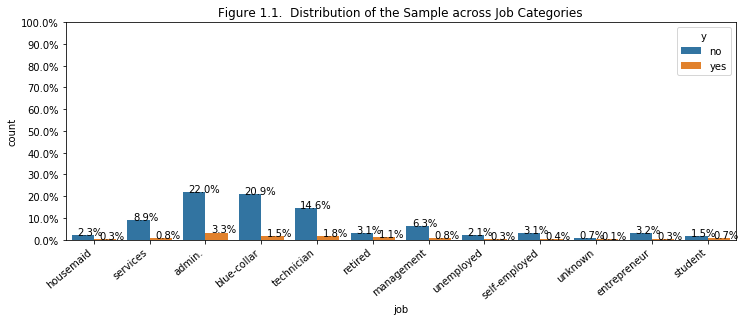

In [28]:
# Distribution of the sample across job categories

plt.figure(figsize=(12,4))
Y = df["y"]
total = len(Y)
ax=sns.countplot(x="job", hue = 'y', data=df)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))
#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Figure 1.1.  Distribution of the Sample across Job Categories')
 
plt.show()

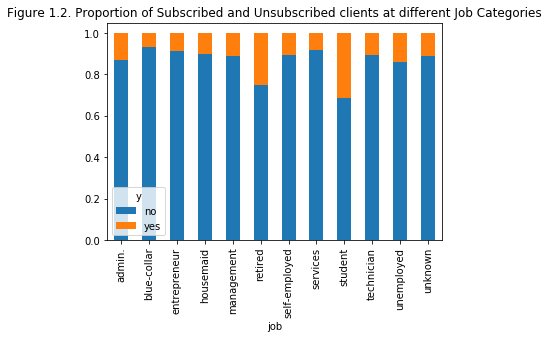

In [29]:
table = pd.crosstab(df.job, df.y)
_=table.div(table.sum(axis=1), axis=0).plot(kind='bar', stacked=True)
_=plt.title('Figure 1.2. Proportion of Subscribed and Unsubscribed clients at different Job Categories')

As shown in Figure 1, although there are many different job categories, we cannot actually suggest a meaningful way to combine some of these classes together. Thus, we prefer to keep these classses as they are. 

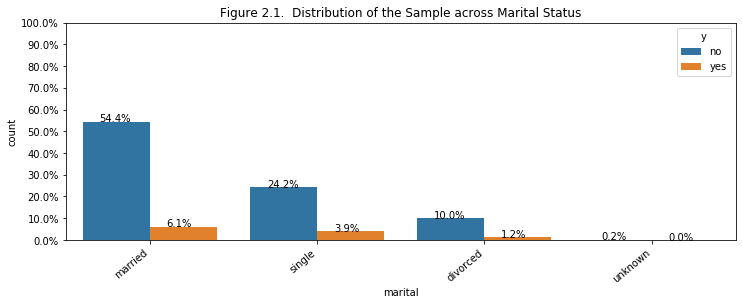

In [26]:
# Distribution of the Sample across Marital Status

plt.figure(figsize=(12,4))
Y = df["y"]
total = len(Y)
ax=sns.countplot(x="marital", hue = 'y', data=df)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Figure 2.1.  Distribution of the Sample across Marital Status')

plt.show()

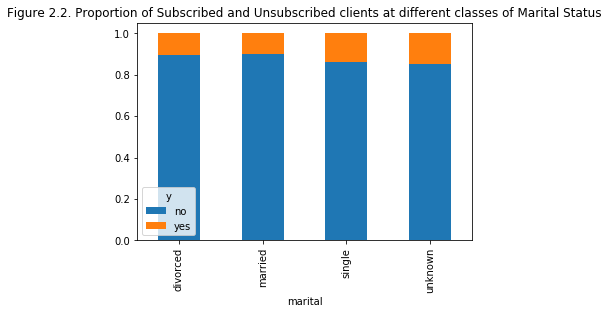

In [27]:
table = pd.crosstab(df.marital, df.y)
_=table.div(table.sum(axis=1), axis=0).plot(kind='bar', stacked=True)
_=plt.title('Figure 2.2. Proportion of Subscribed and Unsubscribed clients at different classes of Marital Status')

As seen in Figure 2.1 and Figure 2.2., after excluding unknown class, one may beleive that marital status doesn't seem to associate with the client's decision for subscription to term deposit (i.e. success of the campaign).

However, as this variable has only three class, we decide to keep it in the study.

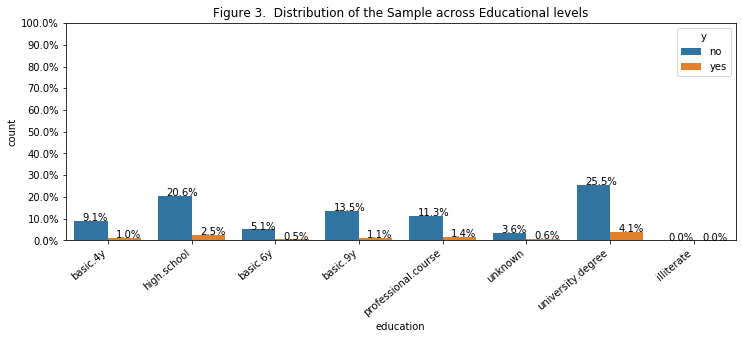

In [106]:
# Distribution of the Sample across Educational levels

plt.figure(figsize=(12,4))
Y = df["y"]
total = len(Y)
ax=sns.countplot(x="education", hue = 'y', data=df)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Figure 3.  Distribution of the Sample across Educational levels')

plt.show()

As shown in Figure 1, illiterate class doesn't have any membership in data and thus can be removed. 

Moreover, different educational levels are recorded in the dataset. However, now it seems reasonable to reduce the number of categories by combining basic educational levels into a seperate class. 

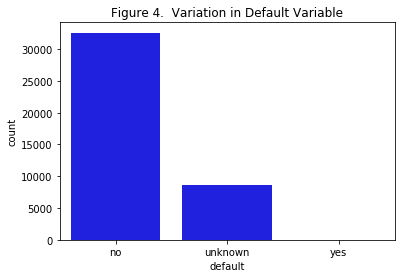

In [8]:
#Check for variation in default 
_=sns.countplot(x = 'default', data = df, color = 'blue')
_=plt.title('Figure 4.  Variation in Default Variable')

In [23]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

As shown by Figure 4, there are only 3 clients having by default credit ('yes' class). On the other hand, there are more than 8000 observations with 'unknown' label. However, as we will need to treat them as missing values, default variable actually entails one level and thus can be removed from the rest of analysis. 

In [39]:
df = df.drop(['default'], axis = 1)

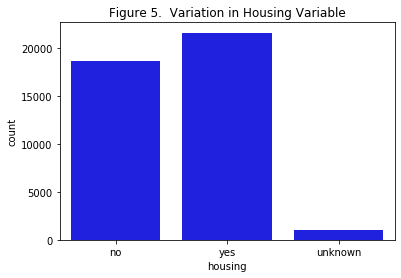

In [16]:
#Check for variation in housing 
_=sns.countplot(x = 'housing', data = df, color = 'blue')
_=plt.title('Figure 5.  Variation in Housing Variable')

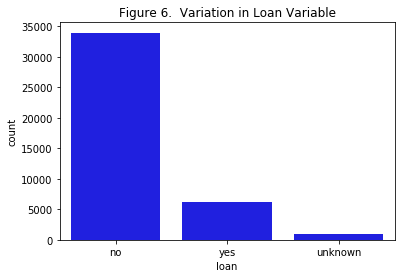

In [17]:
#Check for variation in loan 
_=sns.countplot(x = 'loan', data = df, color = 'blue')
_=plt.title('Figure 6.  Variation in Loan Variable')

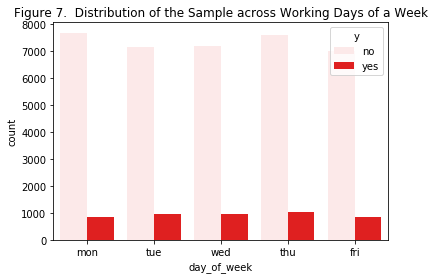

In [19]:
# Distribution of the sample across working days of a week
sns.countplot(x = 'day_of_week', hue = 'y', data = df, color = 'red')
_=plt.title('Figure 7.  Distribution of the Sample across Working Days of a Week')

As indicated in Figure 7, not any noticeable difference appears in the frequency level of the campaign success across weekdays.
Thus, we decide to exclude this variable from the rest of study. 

In [40]:
df = df.drop(['day_of_week'], axis = 1)

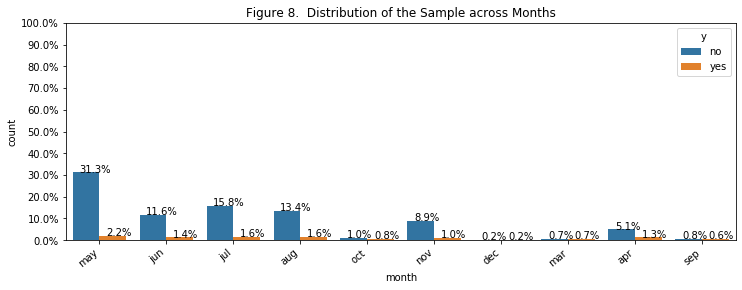

In [22]:
# Distribution of the Sample across Months

plt.figure(figsize=(12,4))
Y = df["y"]
total = len(Y)
ax=sns.countplot(x="month", hue = 'y', data=df)
for p in ax.patches:
    ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

ax.yaxis.set_ticks(np.linspace(0, total, 11))
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title('Figure 8.  Distribution of the Sample across Months')

plt.show()

In [23]:
df['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

As indicated in Figure 8, this dataset doesn't include any record for January and February. 

Also, regardless of the campaign's success or failure, there are only a few recordes in december which may be related to holidays. However, we decide to keep all levels of this variable.

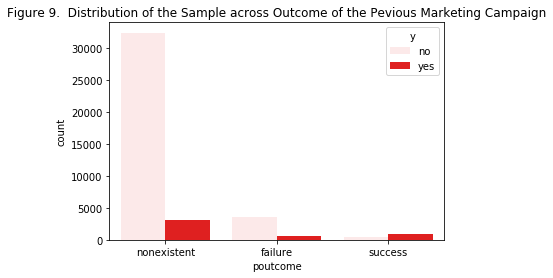

In [32]:
# Distribution of the sample across Outcome of the Pevious Marketing Campaign
sns.countplot(x = 'poutcome', hue = 'y', data = df, color = 'red')
_=plt.title('Figure 9.  Distribution of the Sample across Outcome of the Pevious Marketing Campaign')

As indicated in Figure 9, the largest part of data associates with clients who were't supposedly involved in the previous campaign as not any report exists for this group of clients. Thus, it seems reasonable to differentiate clients who were involved in previous campaigns or not. 

C:\Users\Goldenhelp.ir\Anaconda3\lib\site-packages\pandas\core\frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


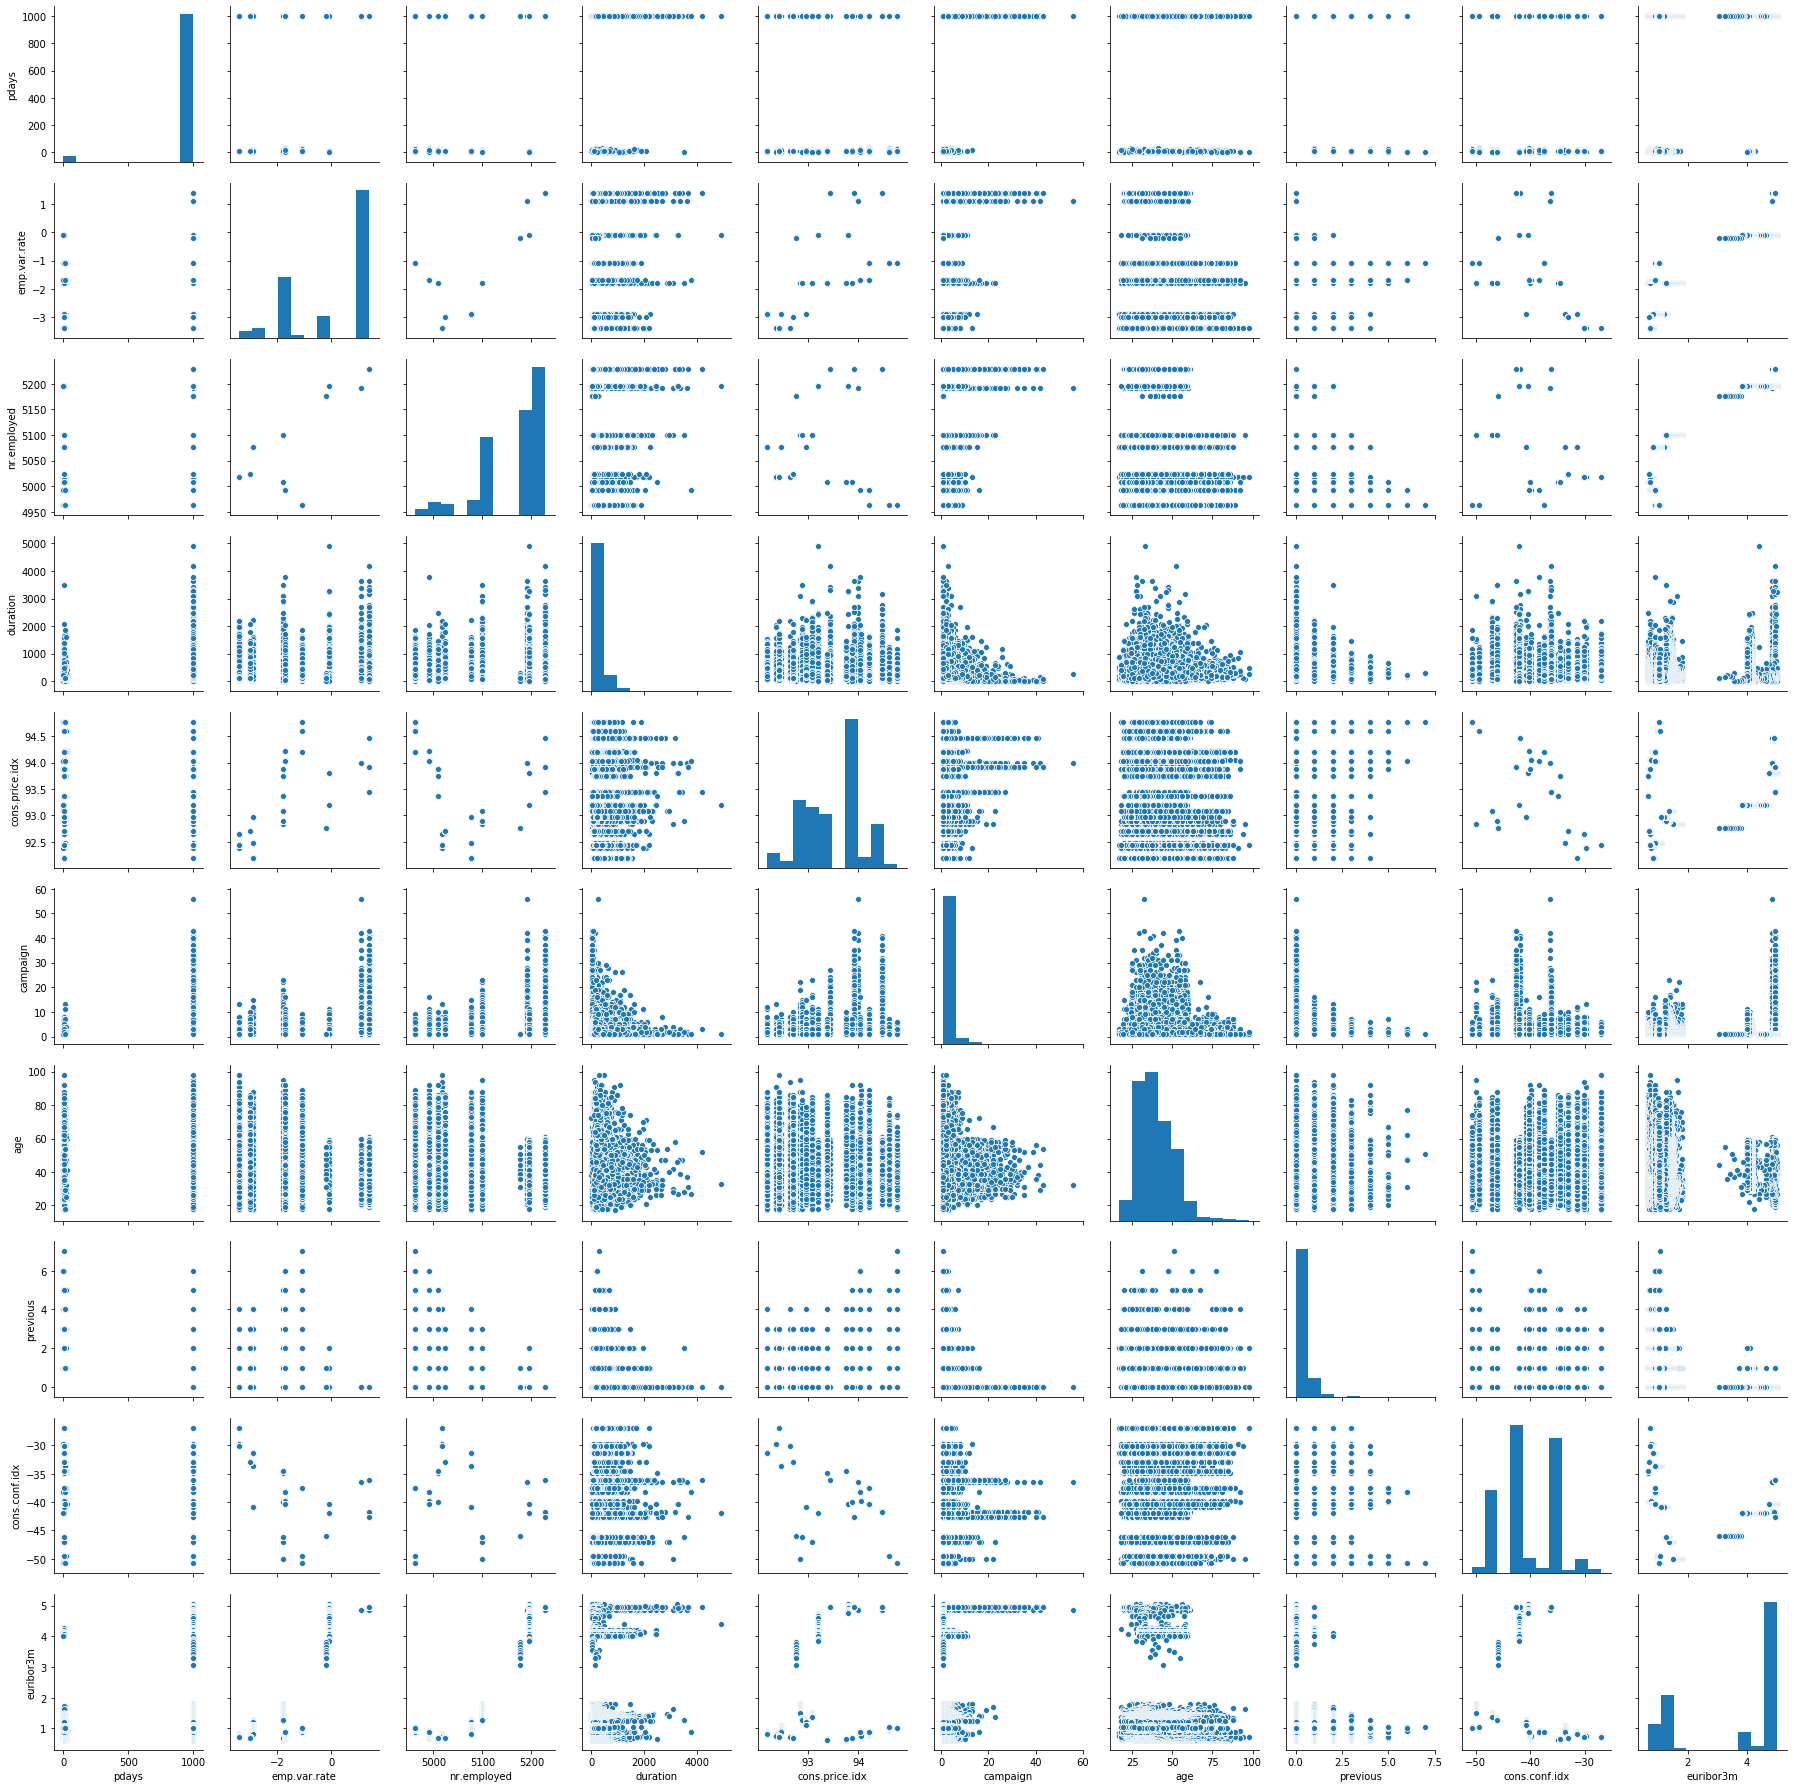

In [30]:
# Extracts the numerical values
numerical_val = list(set(df.columns) - set(df.dtypes[df.dtypes == object].index))
df_num=df[numerical_val]
df_num.head()
df_num.fillna(value = 0, inplace = True)
Attr_pplot = sns.pairplot(df_num) 

As indicated scatter plot matrix, most of continuous variables don't follow a clear normal distribution; however, variables of age, consumer price index, and consumer confidence index are fairly distributed normally. Thus, one may conclude that dataset isn't biased at these dimensions.

On the other hand, variables of campaign, duration, previous, and particularly pdays (due to the presence of a large number of 999 value) seem strongly biased by being heavily loaded on certain values. 

In [72]:
# Check for the proportion of number 999 in pdays column
len(df[df['pdays']==999])/len(df)

0.9632174419733903

As mentioned in Table 1, 999 is assigned to identify cases which a client wasn't contacted previuosly. One may be concerned that this large value, as opposed to much smaller values associated with other cases, is not really meaningful. However, as shown above, 96% of values correspond with these cases. Thus, replacing these records with nan values doesn't seem to be a good strategy and we decide to keep it as it is.  

## Data Preprocessing

In [41]:
# Checks if there is any numeric variable with zero variance
df.std()

age                10.421250
duration          259.279249
campaign            2.770014
pdays             186.910907
previous            0.494901
emp.var.rate        1.570960
cons.price.idx      0.578840
cons.conf.idx       4.628198
euribor3m           1.734447
nr.employed        72.251528
dtype: float64

As indicated above, there isn't any numeric variable with zero variance to be a matter of concern.

In [42]:
# Checks if there is any categorical variable with zero variance

# Gives the categorical variables minus the target variable in our dataset
categorical_var = list(set(df.dtypes[df.dtypes == object].index) - set(['y']))

# Creates an empty list for categorical variables with zero variation
zero_cardinality = [] 

for i in categorical_var: # for each categorical variables
    if len(df[i].value_counts().index) == 1: # check how many levels it has and if it is one
        zero_cardinality.append(i) # the variable has zero variance as the cardinality is one 
        
print('There are',len(zero_cardinality),'categorical variables with zero cardinality')        

There are 0 categorical variables with zero cardinality


As indicated above and confirmed by what we observe through visualizations, there isn't also any categorical variable with zero variance to be a matter of concern.

As shown in Table 1, classes of all categorical variables are limitted. Thus, high cardinality won't be a challenge as well.  

In [28]:
# Check the existance of missing values
print ('Varible     Number of missing values') 
len(df) - df.count()

Varible     Number of missing values


age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
# Percentage of unknown records in categorical variables
for i in categorical_var:
    print('Percentage of unknown values for',i,':',len(df[df[i]=='unknown'])*100/len(df[i]))

Percentage of unknown values for poutcome : 0.0
Percentage of unknown values for job : 0.8012042342429834
Percentage of unknown values for housing : 2.40361270272895
Percentage of unknown values for month : 0.0
Percentage of unknown values for loan : 2.40361270272895
Percentage of unknown values for contact : 0.0
Percentage of unknown values for education : 4.202680392347285
Percentage of unknown values for marital : 0.1942313295134505


As shown above, although current data doesn't seem to have any missing value, due to the presence of "unknown" value under categorical columns, we decide to treat them as missing records.

It is seen that a small portion of variables associate with unknown records. Thus, we can impute these values with the mode of corresponding columns, without any serious concern. 

In [43]:
categorical_var

['poutcome',
 'job',
 'housing',
 'month',
 'loan',
 'contact',
 'education',
 'marital']

In [47]:
df.loc[5,'poutcome']

'nonexistent'

In [48]:
# Imputing unknown records with mode of the associated column
for i in categorical_var:
    mode=df[categorical_var].mode().loc[0,i]
    for j in range(0,len(df)):
        if df.loc[j,i]=='unknown':
            df.loc[j,i]=mode

As discussed earlier, it seems reasonable to differentiate clients who were involved in previous campaigns or not.
To do so, we need to define a new binary variable, called 'inprev' (1 if the client was involved in a previous campaign), and replace 'nonexistent' records of 'poutcome' column with nan values. 

By doing so , the proportion of missing values after modifying poutcome variable is too large(86.34%), thus making it eassential to drop poutcome and use the newly-created variable (inprev).

In [52]:
df['inprev']=df['poutcome'] # whether a client is involved in a previous campaign or not

df.loc[df['inprev'] == "failure", 'inprev'] = 1 # assigns 1 to previuosly-involved clients
df.loc[df['inprev'] == "success", 'inprev'] = 1 # assigns 1 to previuosly-involved clients

df.loc[df['inprev'] == "nonexistent", 'inprev'] = 0 # assigns 0 to not previuosly-involved clients
df.loc[df['poutcome'] == "nonexistent", 'poutcome'] = np.nan # assigns 0 to not previuosly-involved clients

df = df.drop(['poutcome'], axis = 1)

In [53]:
# Double check to make sure that after these modifications, there is not any record of missing values in data.
print ('Varible     Number of missing values') 
df.isnull().sum()

Varible     Number of missing values


age               0
job               0
marital           0
education         0
housing           0
loan              0
contact           0
month             0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
inprev            0
dtype: int64

As discussed earlier, we can reasonably combine basic educational levels into a new variable, thus reducing the number of different classes of education. 

In [54]:
#convert education to dummy
df_edu = pd.get_dummies(df['education'], drop_first = False)

#concatenating the 'basic' years of edu into one column edu
df_edu['basic'] = df_edu['basic.4y'] + df_edu['basic.6y']+df_edu['basic.9y']

#dropping the old 'basic' variables and 'illiterate' (illiterate has no contribution-see plot)
df_edu = df_edu.drop(['basic.4y', 'basic.6y', 'basic.9y', 'illiterate'], axis = 1)

#concat edu with main df
df = pd.concat([df, df_edu], axis = 1)
df = df.drop(['education'], axis = 1)

In [55]:
df['basic'].value_counts()

0    28675
1    12513
Name: basic, dtype: int64

In [56]:
# Binarize yes and no values across the entire dataset
df.replace(('yes','no'), (1,0), inplace = True)

In [57]:
# Creating dummies from Categorical Variables 
categorical_var = list(set(df.dtypes[df.dtypes == object].index) - set(['y','basic']))

# Create dummy variables using onehot encoding
dummy_cat_df = pd.get_dummies(df[categorical_var], drop_first=True)

# Drops categorical variables from the df
df = df.drop(categorical_var, axis = 1) 

# Adds the newly created dummy variables instead
df = pd.concat([df, dummy_cat_df], axis = 1)

In [58]:
# An overview of newly-created columns
df.columns

Index(['age', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'inprev', 'high.school', 'professional.course',
       'university.degree', 'basic', 'marital_married', 'marital_single',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'contact_telephone',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [59]:
# Data is Preprocessed as shown below
df.head()

,age,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,56,0,0,261,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,0
1,57,0,0,149,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,0
2,37,1,0,226,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,0
3,40,0,0,151,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,0
4,56,0,1,307,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,0,0,1,0,0,0


In [60]:
# Save the output to csv file (data is not scaled and is unbalanced)
df.to_csv('Bank_Preprocessed_Not_Scaled.csv', index = False)

## Making Predictions and Model Assessment

In [79]:
df = pd.read_csv('Bank_Preprocessed_Not_Scaled.csv')

Regarding the binary nature of the output variable (y), logistic regression, decision tree, random forest, and k-nearest neighbors seem to be appropriate classification methods for the current study. 

Initially, we need to first scale data and then make it balanced to have a more reliable outputs by the implementation of classification algorithms.

In the following, we will fit these four models to the balaced and scaled data to compare their performance at different situations.

In [30]:
# libraries we need
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.metrics import roc_curve, auc
#from sklearn.metrics import f1_score, precision_score, recall_score

In [81]:
# Scaling

# We don't need to scale binary variables. Thus, limit the scaling procedure to only continuous variables
cont_val=['age', 'duration', 'campaign', 'pdays', 'previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

# converts pandas df to numpy array
array = df[cont_val].values 

# creates a min max scaler
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1)) 

# Scales the data and overwrites it into the existing dataframe
df[cont_val] = pd.DataFrame(data_scaler.fit_transform(array), 
                                 columns = cont_val) 

In [84]:
# Balancing
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0) # using the smote technique (somehow oversampling) to balance the data

input_var = list(set(df.columns) - set(['y'])) # sets the input var

X, Y = os.fit_sample(df[df.columns.difference(['y'])], df['y']) # oversamples the data
X = pd.DataFrame(X, columns = input_var) # makes the X array as a dataframe
Y = pd.DataFrame(Y, columns = ['y']) # makes the Y array as a dataframe

df = pd.concat([X, Y], axis=1) # Combine X and Y

In [87]:
df['y'].value_counts()

1    36548
0    36548
Name: y, dtype: int64

In [88]:
# Save the output to csv file (data is scaled and is balanced)
df.to_csv('Bank_Preprocessed_Scaled_Balanced.csv', index = False)

In the following, we define three functions to creat, predict, and evaluate the performance of suggested models.

In [31]:
df = pd.read_csv('Bank_Preprocessed_Scaled_Balanced.csv')

In [4]:
# Creating models
def Model_Bank (IVs, DV): # IVs: Independent variables, DV: Dependent variable
    
    # split data to training and testing samples
    X_train, X_test, Y_train, Y_test = train_test_split(IVs, DV, test_size=0.33, random_state=42)
    
    # fitting models
    
    # Logistic Regression
    lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train, Y_train)
    
    # Decision Trees
    dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
    dt.fit(X_train, Y_train)
    
    # Random Forests
    rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
    rf.fit(X_train, Y_train)
    
    # K-NN
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train, Y_train)
    
    return lr, dt, rf, knn, X_test, Y_test 

In [5]:
# Making prediction
def Pred_Bank(model_lr, model_dt, model_rf, model_knn, X_test):
    # predicts the Y given the fitted model lr
    pred_Y_lr =model_lr.predict(X_test)

    # predicts the Y given the fitted model dt
    pred_Y_dt =model_dt.predict(X_test)

    # predicts the Y given the fitted model rf
    pred_Y_rf =model_rf.predict(X_test)

    # predicts the Y given the fitted model dt
    pred_Y_knn =model_knn.predict(X_test)
    
    return pred_Y_lr, pred_Y_dt, pred_Y_rf, pred_Y_knn

In [6]:
# computes the confusion matrix and performence indicators
def get_performance(actual_Y, pred_Y):
    cm = confusion_matrix(actual_Y, pred_Y) # c00: TN, , c01:FP, c10: FN, c11: TP  
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total  
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1]) #TP/(TP+FN)
    specificity = cm[0,0]/(cm[0,0]+cm[0,1]) #TN/(TN+FP)
    #Precision=precision_score(pred_Y, actual_Y)
    #Recall=recall_score(pred_Y, actual_Y)
    #F1_Score=f1_score(pred_Y, actual_Y)
    #FPR=cm[0,1]/(cm[0,0]+cm[0,1]) #FP/(TN+FP)
    #miss_rate=1-Recall #FN/(TP+FN)
    
    return accuracy, sensitivity, specificity

In [7]:
# Builds a dataframe using the performance indicators so that we can compare the models easily
def Perf_Bank(Y_test, pred_Y_lr, pred_Y_dt, pred_Y_rf, pred_Y_knn):
  
    # Performance measures for model lr
    accuracy_lr, sensitivity_lr, specificity_lr = get_performance(Y_test, pred_Y_lr)

    # Performance measures for model dt
    accuracy_dt, sensitivity_dt, specificity_dt = get_performance(Y_test, pred_Y_dt)

    # Performance measures for model rf
    accuracy_rf, sensitivity_rf, specificity_rf = get_performance(Y_test, pred_Y_rf)

    # Performance measures for model knn
    accuracy_knn, sensitivity_knn, specificity_knn = get_performance(Y_test, pred_Y_knn)

    perf = pd.DataFrame([accuracy_lr, accuracy_dt,accuracy_rf,accuracy_knn], 
                        columns = ['Accuracy'], 
                        index = ['Logistic Regression', 'Decision Trees', 'Random Forest','K-NN'])
                            
    perf['sensitivity'] = np.asarray([sensitivity_lr, sensitivity_dt, sensitivity_rf, sensitivity_knn])

    perf['specificity'] = np.asarray([specificity_lr, specificity_dt, specificity_rf, specificity_knn])
   
    return perf

In [16]:
def ROC_Bank(input_var,Title):
    
    # split data to training and testing samples
    X_train, X_test, Y_train, Y_test = train_test_split(df[input_var],df['y'], test_size=0.33, random_state=42)
    lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train, Y_train)
    
    # fitting models
    
    # Logistic Regression
    lr = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr')
    lr.fit(X_train, Y_train)
    
    # Decision Trees
    dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=15)
    dt.fit(X_train, Y_train)
    
    # Random Forests
    rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
    rf.fit(X_train, Y_train)
    
    # K-NN
    knn = KNeighborsClassifier(n_neighbors = 5)
    knn.fit(X_train, Y_train)

    # Calculating the area under the ROC curve for lr
    score_Y_dt_lr = lr.predict_proba(X_test)
    fpr_balanced_lr, tpr_balanced_lr, _ = roc_curve(Y_test, score_Y_dt_lr[:,1])
    roc_auc_balanced_lr = auc(fpr_balanced_lr, tpr_balanced_lr)

    # Calculating the area under the ROC curve for dt
    score_Y_dt_dt = dt.predict_proba(X_test)
    fpr_balanced_dt, tpr_balanced_dt, _ = roc_curve(Y_test, score_Y_dt_dt[:,1])
    roc_auc_balanced_dt = auc(fpr_balanced_dt, tpr_balanced_dt)
    
    # Calculating the area under the ROC curve for rf
    score_Y_dt_rf = rf.predict_proba(X_test)
    fpr_balanced_rf, tpr_balanced_rf, _ = roc_curve(Y_test, score_Y_dt_rf[:,1])
    roc_auc_balanced_rf = auc(fpr_balanced_rf, tpr_balanced_rf)
    
    # Calculating the area under the ROC curve for knn
    score_Y_dt_knn = knn.predict_proba(X_test)
    fpr_balanced_knn, tpr_balanced_knn, _ = roc_curve(Y_test, score_Y_dt_knn[:,1])
    roc_auc_balanced_knn = auc(fpr_balanced_knn, tpr_balanced_knn)
    
    # Plot the curve
    plt.figure()
    plt.plot(fpr_balanced_lr, tpr_balanced_lr, color='darkorange',lw=2, label='Logistic Regression (area = %0.2f)' % roc_auc_balanced_lr)
    plt.plot(fpr_balanced_dt, tpr_balanced_dt, color='green',lw=2, label='Decision Tree (area = %0.2f)' % roc_auc_balanced_dt)
    plt.plot(fpr_balanced_rf, tpr_balanced_rf, color='y',lw=2, label='Random Forest (area = %0.2f)' % roc_auc_balanced_rf)
    plt.plot(fpr_balanced_knn, tpr_balanced_knn, color='b',lw=2, label='K-NN (area = %0.2f)' % roc_auc_balanced_knn)

    
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(Title)
    plt.legend(loc="lower right")
    plt.show()

<h6> All variables are included in the model</h6>

In [95]:
input_var  = set(df.columns) - set(['y'])
X = df[input_var]
Y = df['y']

In [96]:
# Fitting models
lr, dt, rf, knn, X_test, Y_test = Model_Bank(X,Y)

C:\Users\Goldenhelp.ir\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [97]:
# Making predictions
pred_lr, pred_dt, pred_rf, pred_knn = Pred_Bank(lr, dt, rf, knn, X_test)

In [100]:
# Assessig performance
print('Table 5. Comparison between Models (All variables are included)')
Perf_Bank(Y_test, pred_lr, pred_dt, pred_rf, pred_knn)

Table 5. Comparison between Models (All variables are included)


,Accuracy,sensitivity,specificity
Logistic Regression,0.890598,0.909008,0.872270
Decision Trees,0.919866,0.933355,0.906436
Random Forest,0.884504,0.931195,0.838021
K-NN,0.898392,0.951138,0.845880


C:\Users\Goldenhelp.ir\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Goldenhelp.ir\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

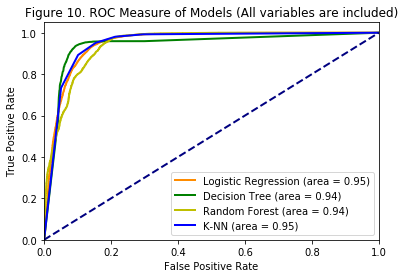

In [20]:
input_var  = set(df.columns) - set(['y'])
Title='Figure 10. ROC Measure of Models (All variables are included)'
ROC_Bank(input_var,Title)

As represented by Table 5 and Figure 10., in the case that all variables are included, the overall accuracy is around 90% which is good and decision tree associates with the highest accuracy among models. 

While decision tree performs the best based on the measure of accuracy and specificity, K-NN is the best model in terms of sensitivity.

Referring to ROC values, Logistic regression and K_NN suggest a slightly better performance.

<h6> Highly-corelated variables are excluded</h6>

In [7]:
input_var  = set(df.columns) - set(['y', 'cons.price.idx', 'euribor3m', 'nr.employed'])
X = df[input_var]
Y = df['y']

In [11]:
# Fitting models
lr, dt, rf, knn, X_test, Y_test = Model_Bank(X,Y)

C:\Users\Goldenhelp.ir\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
# Making predictions
pred_lr, pred_dt, pred_rf, pred_knn = Pred_Bank(lr, dt, rf, knn, X_test)

In [13]:
# Assessig performance
print('Table 6. Comparison between Models (Highly correlated variables are Excluded)')
Perf_Bank(Y_test, pred_lr, pred_dt, pred_rf, pred_knn)

Table 6. Comparison between Models (Highly correlated variables are included)


,Accuracy,sensitivity,specificity
Logistic Regression,0.887157,0.903440,0.870946
Decision Trees,0.912279,0.931112,0.893531
Random Forest,0.890349,0.942829,0.838104
K-NN,0.897065,0.944408,0.849934


C:\Users\Goldenhelp.ir\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Goldenhelp.ir\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

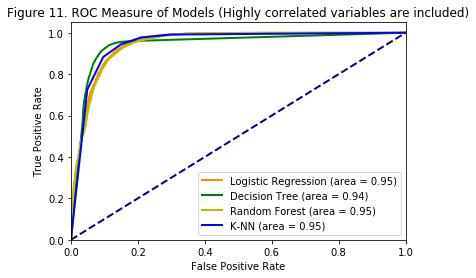

In [19]:
input_var  = set(df.columns) - set(['y', 'cons.price.idx', 'euribor3m', 'nr.employed'])
Title='Figure 11. ROC Measure of Models (Highly correlated variables are included)'
ROC_Bank(input_var,Title)

As represented by Table 6 and Figure 11., by excluding highly-correlated variables, performance measures don't represent any noticeable change. Thus, presence of these highly correlated pairs doesn't seem to be a serious challenge in this regard.

However, referring to ROC curve, models now compete very closely with each other.  

<h6> Variables subjected to cause bias are excluded</h6>

In [8]:
input_var  = set(df.columns) - set(['y', 'campaign', 'duration', 'previous', 'pdays'])
X = df[input_var]
Y = df['y']

In [9]:
# Fitting models
lr, dt, rf, knn, X_test, Y_test = Model_Bank(X,Y)

C:\Users\Goldenhelp.ir\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [10]:
# Making predictions
pred_lr, pred_dt, pred_rf, pred_knn = Pred_Bank(lr, dt, rf, knn, X_test)

In [11]:
# Assessig performance
print('Table 7. Comparison between Models (Variables subjected to cause bias are excluded)')
Perf_Bank(Y_test, pred_lr, pred_dt, pred_rf, pred_knn)

Table 7. Comparison between Models (Variables subjected to cause bias are excluded)


,Accuracy,sensitivity,specificity
Logistic Regression,0.750725,0.679658,0.821476
Decision Trees,0.875757,0.830563,0.920748
Random Forest,0.744010,0.643344,0.844226
K-NN,0.800929,0.834968,0.767042


C:\Users\Goldenhelp.ir\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Goldenhelp.ir\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.h

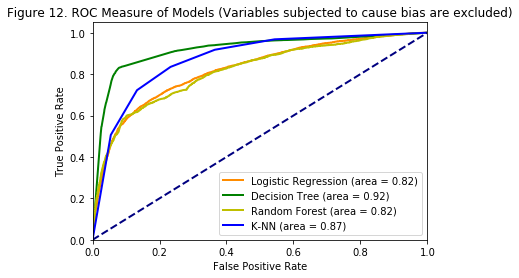

In [18]:
input_var  = set(df.columns) - set(['y', 'campaign', 'duration', 'previous', 'pdays'])
Title='Figure 12. ROC Measure of Models (Variables subjected to cause bias are excluded)'
ROC_Bank(input_var,Title)

As indicated in Table 7 and Figure 12, excluding four variables that we assumed to be a source of bias in dataset, impairs the classification performance by reducing the overall accuracy to around 80%. Thus, it seems that these variables (or some of them) are important predictors of the group membership.

<h6> Variables assumed to be less imporatnt in making difference are excluded</h6>

As discussed earlier, marital status doesn't seem to be a potential discriminator between groups. 

Moreover, there are too few records for some months that we created dummy for. 

In this last section, we want to exclude these variables, along with highly-correlated pairs and comment on the performance.

In [21]:
input_var  = set(df.columns) - set(['y', 'marital', 'month_dec', 'month_mar','month_oct', 'month_sep','cons.price.idx', 'euribor3m', 'nr.employed'])
X = df[input_var]
Y = df['y']

In [22]:
# Fitting models
lr, dt, rf, knn, X_test, Y_test = Model_Bank(X,Y)

In [23]:
# Making predictions
pred_lr, pred_dt, pred_rf, pred_knn = Pred_Bank(lr, dt, rf, knn, X_test)

In [24]:
# Assessig performance
print('Table 8. Comparison between Models (Variables assumed to be less important or highly-correlated are excluded)')
Perf_Bank(Y_test, pred_lr, pred_dt, pred_rf, pred_knn)

Table 8. Comparison between Models (Variables assumed to be less important or highly-correlated are excluded)


,Accuracy,sensitivity,specificity
Logistic Regression,0.886701,0.903773,0.869705
Decision Trees,0.911574,0.932774,0.890470
Random Forest,0.879156,0.918564,0.839924
K-NN,0.896733,0.942496,0.851175


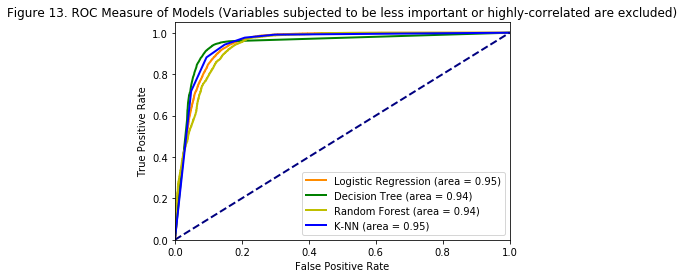

In [26]:
input_var  = set(df.columns) - set(['y', 'marital', 'month_dec', 'month_mar','month_oct', 'month_sep','cons.price.idx', 'euribor3m', 'nr.employed'])
Title='Figure 13. ROC Measure of Models (Variables subjected to be less important or highly-correlated are excluded)'
ROC_Bank(input_var,Title)

As indicated in Table 8 and Figure 13, our recent decision about dimentionality reduction by dropping less important variables and highly-correlated pairs, doesn't cause a significant difference among performance measure. 

However, the interesting change we observe by doing so is that the previous warning massages about convergence now disappears.

In general, our tests show that <b>decision tree</b> and <b>k-NN</b> can be a reasonable candidates for predicting the success of campaigns, using the different variable sets.

As shown by Figure 14, k-NN model can achieve a slightly better accuracy if the number of the nearest neighbours is decreased to 2. As appears, accuracy of the classification is decreasing as the number of neighboring training data points increases.

As indicated by Figure 15, maximum depth of 15, which is selected initially for the random forest model, associates with the optimal value for the highest possible accuracy. As appears, for larger values accuracy tends to decline.

In [32]:
input_var  = set(df.columns) - set(['y', 'marital', 'month_dec', 'month_mar','month_oct', 'month_sep','cons.price.idx', 'euribor3m', 'nr.employed'])

X_train, X_test, Y_train, Y_test = train_test_split(df[input_var],df['y'], test_size=0.33, random_state=42)

# for K-NN model
accuracy=[]
for i in range(2,22,2):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train)

    pred_Y_knn = knn.predict(X_test) # predicts the Y given the fitted model knn

    cm = confusion_matrix(Y_test, pred_Y_knn)
    accuracy.append((cm[0,0]+cm[1,1])/sum(sum(cm)))

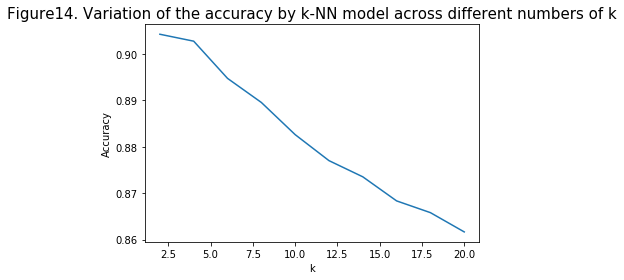

In [35]:
k=list(range(2,22,2))
plt.plot(k,accuracy)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Figure14. Variation of the accuracy by k-NN model across different numbers of k', fontsize=15)
plt.show()

In [38]:
input_var  = set(df.columns) - set(['y', 'marital', 'month_dec', 'month_mar','month_oct', 'month_sep','cons.price.idx', 'euribor3m', 'nr.employed'])

X_train, X_test, Y_train, Y_test = train_test_split(df[input_var],df['y'], test_size=0.33, random_state=42)

# for decision tree model
accuracy=[]
for i in range(5,30,2):
    # Decision Trees
    dt = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=i)
    dt.fit(X_train, Y_train)

    pred_Y_dt = dt.predict(X_test) # predicts the Y given the fitted model rf

    cm = confusion_matrix(Y_test, pred_Y_dt)
    accuracy.append((cm[0,0]+cm[1,1])/sum(sum(cm)))

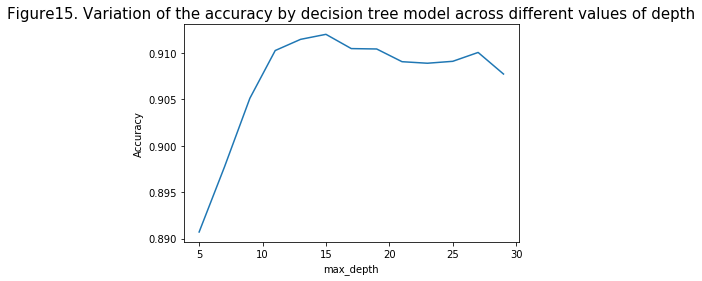

In [39]:
max_depth=list(range(5,30,2))
plt.plot(max_depth,accuracy)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Figure15. Variation of the accuracy by decision tree model across different values of depth', fontsize=15)
plt.show()

### Discussion on the Statistical Significance

In order to have a more convincing predictive tool we need to comment on the statistical significance of contributing variables in the model. However, sklearn features we have used so far are primarily for classification performance rather than interpretability. Inevitably we use Logit estimator from Statsmodels package to have a sense of explanatory power of different variables. 

In this section, we only study the model in which highly-correlated pairs are excluded.
As indicated in Table 9, all variables appear with significant effects at 0.05 level, and also negative association (making it less likely to subscribe for the deposit or failure of the campaign) but those who have housing loan and students (from the job categories) are non-significant.

Thus, from the statistical standpoint marital status and four months we suggested previuosly to discard have significant explanatory power to predict the success of the campaign. However, this discrepency doesn't seem surprising because as we observed, models show slight differences in performance in presence or absence of these variables.

In [28]:
import statsmodels.api as sm
input_var  = set(df.columns) - set(['y', 'cons.price.idx', 'euribor3m', 'nr.employed'])
X = df[input_var]
Y = df['y']
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print('Table 9. Statistical significance when highly-correlated variables are excluded.')
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.307184
         Iterations 8
Table 9. Statistical significance when highly-correlated variables are excluded.
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.557     
Dependent Variable:  y                 AIC:               44979.8322
Date:                2020-03-20 18:58  BIC:               45311.0152
No. Observations:    73096             Log-Likelihood:    -22454.   
Df Model:            35                LL-Null:           -50666.   
Df Residuals:        73060             LLR p-value:       0.0000    
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      8.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
inprev          